# 线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import read_data as rd
from metrics import cwcf, picpf, pinewf

In [2]:
# time series(pd.series) for smooth trend and period workload
ts_sm, ts_tr, ts_pe = rd.load_sp()

# 1. Train and Test for smooth workload

In [3]:
# split to train and test
ts_u_train, ts_u_test, ts_l_train, ts_l_test, ts_train, ts_test = rd.split_train_test(ts_sm)

In [4]:
def linear_predict(cv_tr, cv_te, linreg):
    X_t, y_t = rd.split_to_xy(cv_tr)
    X_e, y_e = rd.split_to_xy(cv_te)
    linreg.fit(X_t, y_t)
    pred = linreg.predict(X_e)
    return pred

## Cross validation

In [5]:
cv = 3
tscv = TimeSeriesSplit(n_splits=cv)

cwc 1.595751, picp 0.583333, pinew 0.819826


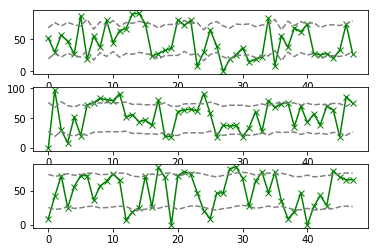

In [6]:
plt_num = cv*100+10+1
cv_t, cv_u, cv_l = np.array(ts_train), np.array(ts_u_train), np.array(ts_l_train)
picp, pinew, cwc = 0, 0, 0
for tr_idx, te_idx in tscv.split(cv_t):
    cv_tr_u, cv_te_u = cv_u[tr_idx], cv_u[te_idx]
    cv_tr_l, cv_te_l = cv_l[tr_idx], cv_l[te_idx]
    cv_tr_t, cv_te_t = cv_t[tr_idx], cv_t[te_idx]
    
    linreg_u = LinearRegression()
    linreg_l = LinearRegression()
    
    pred_u = linear_predict(cv_tr_u, cv_te_u, linreg_u)
    pred_l = linear_predict(cv_tr_l, cv_te_l, linreg_l)
    d = max(len(cv_te_t) - len(pred_u), len(cv_te_t) - len(pred_l))
    
    # 画图
    plt.subplot(plt_num)
    rd.plot_ts_ul(cv_te_t[d:], pred_u, pred_l)
    
    # 计算picp，pinew，cwc
    picp += picpf(cv_te_t[d:], pred_u, pred_l)
    pinew += pinewf(pred_u, pred_l)
    cwc += cwcf(picp, pinew)
    
    plt_num += 1
print("cwc %f, picp %f, pinew %f" % (cwc/cv, picp/cv, pinew/cv))

# 2. Test result

In [7]:
test = np.array(ts_test)
u_train, u_test = np.array(ts_u_train), np.array(ts_u_test)
l_train, l_test = np.array(ts_l_train), np.array(ts_l_test)

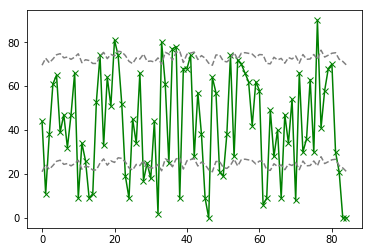

In [8]:
linreg_u = LinearRegression()
linreg_l = LinearRegression()
pred_u = linear_predict(u_train, u_test, linreg_u)
pred_l = linear_predict(l_train, l_test, linreg_l)
d = max(len(test) - len(pred_u), len(test) - len(pred_l))
rd.plot_ts_ul(test[d:], pred_u, pred_l)

In [9]:
picp = picpf(test[d:], pred_u, pred_l)
pinew = pinewf(pred_u, pred_l)
cwc = cwcf(picp, pinew)
print("cwc %f, picp %f, pinew %f" % (cwc, picp, pinew))

cwc 0.876185, picp 0.658824, pinew 0.876185


# 检验

In [10]:
from predict_fx import predict_diff, predict_sp_diff

## 检验 smooth

linear
Result of Cross validation: 
cwc 1.595751, picp 0.583333, pinew 0.819826
Result of Test validation: 
cwc 0.876185, picp 0.658824, pinew 0.876185


(0.8761854427987185, 0.6588235294117647, 0.8761854427987185)

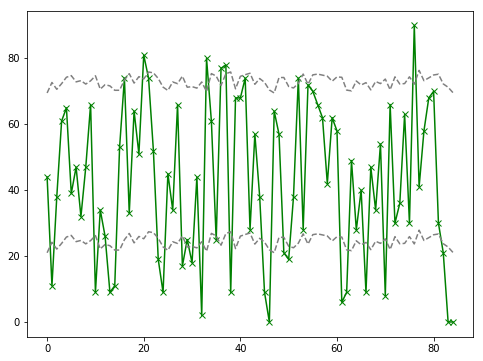

In [17]:
predict_diff(ts_sm, 'linear', is_plt=True)

## 检验 trend

linear
Result of Cross validation: 
cwc 1.440498, picp 0.701389, pinew 0.580754
Result of Test validation: 
cwc 0.409698, picp 0.705882, pinew 0.409698


(0.4096984963694257, 0.7058823529411765, 0.4096984963694257)

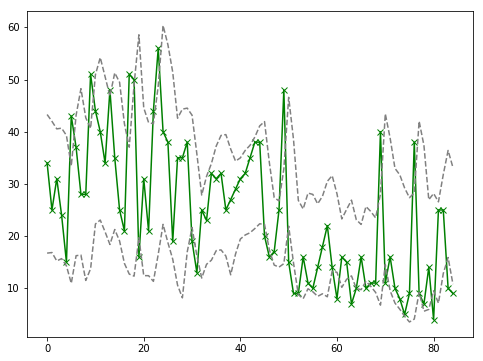

In [18]:
predict_diff(ts_tr, 'linear', is_plt=True)

## 检验period

linear
Result of Cross validation: 
cwc 1.364434, picp 0.625000, pinew 0.606406
Result of Test validation: 
cwc 0.296740, picp 0.623529, pinew 0.296740


(0.29674026836165157, 0.6235294117647059, 0.29674026836165157)

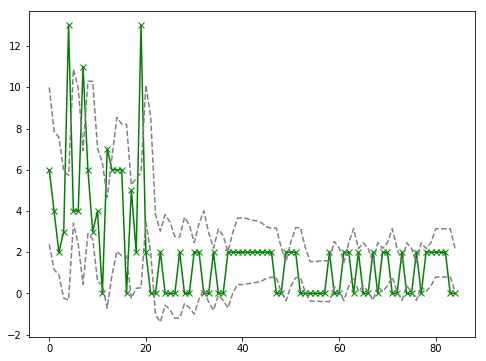

In [19]:
predict_diff(ts_pe, 'linear', is_plt=True)

In [20]:
predict_sp_diff('linear')

linear
linear
Result of Cross validation: 
cwc 1.595751, picp 0.583333, pinew 0.819826
Result of Test validation: 
cwc 0.876185, picp 0.658824, pinew 0.876185
linear
Result of Cross validation: 
cwc 1.440498, picp 0.701389, pinew 0.580754
Result of Test validation: 
cwc 0.409698, picp 0.705882, pinew 0.409698
linear
Result of Cross validation: 
cwc 1.364434, picp 0.625000, pinew 0.606406
Result of Test validation: 
cwc 0.296740, picp 0.623529, pinew 0.296740

Final Result:
cwc 0.527541, picp 0.662745, pinew 0.527541
